In [1]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from scipy import stats

# **DATASETS**

**Consideraciones**:

El proyecto propuesto por el grupo requiere datos sobre la disponibilidad de agua y el consumo de agua por habitante. Sin embargo, dichos datos no estaban disponibles en el planteamiento del problema, a saber:

    1. Precipitacions Barcelona Des De 1786 , 
    2. Dipòsits d'aigües pluvials a la ciutat de Barcelona
    3. Temperatures mitjanes mensuals de l’aire de la ciutat de Barcelona des de 1780 Link
    4. Àrees de la ciutat de Barcelona amb absència de vegetació Link


Incluso, para estimar el volumen de captación de agua, notamos que el Conjunto de Datos (2) no proporciona la capacidad ni el nivel de agua de los depósitos allí descritos.

Por lo tanto, la opción que teníamos para mantener viable el proyecto, como se propuso inicialmente, sin perjudicar al resto de expertos del grupo, era buscar otras fuentes de datos oficiales, lo que logramos. 

Las fuentes encontradas fueron (datos oficiales de la Adjunta de Barcelona):
 
    A. Evolución de la población total (1970-2022): https://ajuntament.barcelona.cat/estadistica/castella/Estadistiques_per_temes/Poblacio_i_demografia/Poblacio/Xifres_oficials_poblacio/evo/t01.htm

    B. Evolución mensual del consumo de agua (1995-2023): https://ajuntament.barcelona.cat/estadistica/angles/Estadistiques_per_temes/Economia/Consum_comerc_i_preus/Consum/coev04.htm
    
Los datos resultantes demandaran revisiones/manipulaciones para eliminar inconsistencias.

Comentarios:

Para estimar la extracción de agua, investigamos los siguientes conjuntos de datos, las fuentes encontradas fueron (datos oficiales de la Diputación de Barcelona):


C. Superficie (ha) 2021 por Barrios: https://ajuntament.barcelona.cat/estadistica/castella/Territori/sup/a2021/S03.htm

D. Estat dels embassaments de conques internes de capacitat superior a 2 hm³ a
15/11/2023  : https://info.aca.gencat.cat/ca/aca/informacio/informesdwh/dades_embassaments_ca.pdf



In [105]:
#A. Evolución de la población total (1970-2022)
df_poblacion = pd.read_csv("Datos/PoblacionEvolucion.csv",sep=";")

#B. Evolución mensual del consumo de agua (1995-2023)
df_consumo = pd.read_csv("Datos/ConsumoHistorico.csv",sep=";")

#1. Precipitacions Barcelona Des De 1786
df_precip = pd.read_csv("Datos/precipitacionsbarcelonadesde1786.csv")

#3. Temperatures mitjanes mensuals de l’aire de la ciutat de Barcelona des de 1780 Link
df_temp = pd.read_csv("Datos/temperaturesbarcelonadesde1780.csv")

In [106]:
#Verificaciones del dataset "df_poblacion"
print(df_poblacion.info())
df_poblacion.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Año         23 non-null     object
 1   Barcelona   23 non-null     object
 2   Bcn_metro   23 non-null     object
 3   Bcn_metro2  23 non-null     object
 4   Provincia   23 non-null     object
 5   Cataluna    23 non-null     object
 6   Espana      23 non-null     object
dtypes: object(7)
memory usage: 1.4+ KB
None


,Año,Barcelona,Bcn_metro,Bcn_metro2,Provincia,Cataluna,Espana
0,2000,1.496.266,2.903.802,4.328.447,4.736.277,6.261.999,40.499.791
1,2001,1.505.325,2.927.721,4.390.413,4.804.606,6.361.365,41.116.842
2,2002,1.527.190,2.972.870,4.482.623,4.906.117,6.506.440,41.837.894
3,2003,1.582.738,3.056.505,4.618.257,5.052.666,6.704.146,42.717.064
4,2004,1.578.546,3.069.583,4.673.648,5.117.885,6.813.319,43.197.684


In [107]:
""" #### Campos ####
Año :       | Año
Barcelona   | Población Barcelona
Bcn_metro   | Población Barcelona - Área Metropolitana
Bcn_metro2  | Población Barcelona - Âmbito Metropolitano
Provincia   | Población Barcelona - Província
Cataluna    | Población Región
Espana      | Población España"""

#Además, hay necesidad de convertir los campos no numéricos en numéricos (población)

' #### Campos ####\nAño :       | Año\nBarcelona   | Población Barcelona\nBcn_metro   | Población Barcelona - Área Metropolitana\nBcn_metro2  | Población Barcelona - Âmbito Metropolitano\nProvincia   | Población Barcelona - Província\nCataluna    | Población Región\nEspana      | Población España'

In [108]:
#Hay ruídos en los datos del Dataset "df_poblacion", en las 2 posiciones finales del string.
for i in df_poblacion:
    print(" - VARIABLE: ", i)
    print("> VALORES: ", df_poblacion[i].unique(),"\n")

 - VARIABLE:  Año
> VALORES:  ['2000\xa0\xa0' '2001\xa0\xa0' '2002\xa0\xa0' '2003\xa0\xa0'
 '2004\xa0\xa0' '2005\xa0\xa0' '2006\xa0\xa0' '2007\xa0\xa0'
 '2008\xa0\xa0' '2009\xa0\xa0' '2010\xa0\xa0' '2011\xa0\xa0'
 '2012\xa0\xa0' '2013\xa0\xa0' '2014\xa0\xa0' '2015\xa0\xa0'
 '2016\xa0\xa0' '2017\xa0\xa0' '2018\xa0\xa0' '2019\xa0\xa0'
 '2020\xa0\xa0' '2021\xa0\xa0' '2022\xa0\xa0'] 

 - VARIABLE:  Barcelona
> VALORES:  ['1.496.266\xa0\xa0' '1.505.325\xa0\xa0' '1.527.190\xa0\xa0'
 '1.582.738\xa0\xa0' '1.578.546\xa0\xa0' '1.593.075\xa0\xa0'
 '1.605.602\xa0\xa0' '1.595.110\xa0\xa0' '1.615.908\xa0\xa0'
 '1.621.537\xa0\xa0' '1.619.337\xa0\xa0' '1.615.448\xa0\xa0'
 '1.620.943\xa0\xa0' '1.611.822\xa0\xa0' '1.602.386\xa0\xa0'
 '1.604.555\xa0\xa0' '1.608.746\xa0\xa0' '1.620.809\xa0\xa0'
 '1.620.343\xa0\xa0' '1.636.762\xa0\xa0' '1.664.182\xa0\xa0'
 '1.636.732\xa0\xa0' '1.636.193\xa0\xa0'] 

 - VARIABLE:  Bcn_metro
> VALORES:  ['2.903.802\xa0\xa0' '2.927.721\xa0\xa0' '2.972.870\xa0\xa0'
 '3.056.505\

In [109]:
#Limpieza de los campos y conversión de los valores de "df_poblacion":
for i in df_poblacion:
    df_poblacion[i] = df_poblacion[i].str[:-2]
    df_poblacion[i] = df_poblacion[i].str.replace(".","")
    df_poblacion[i] = df_poblacion[i].str.replace(".","")
    df_poblacion[i] = df_poblacion[i].astype("int")

In [110]:
print(df_poblacion.info())

df_poblacion.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Año         23 non-null     int64
 1   Barcelona   23 non-null     int64
 2   Bcn_metro   23 non-null     int64
 3   Bcn_metro2  23 non-null     int64
 4   Provincia   23 non-null     int64
 5   Cataluna    23 non-null     int64
 6   Espana      23 non-null     int64
dtypes: int64(7)
memory usage: 1.4 KB
None


,Año,Barcelona,Bcn_metro,Bcn_metro2,Provincia,Cataluna,Espana
0,2000,1496266,2903802,4328447,4736277,6261999,40499791
1,2001,1505325,2927721,4390413,4804606,6361365,41116842
2,2002,1527190,2972870,4482623,4906117,6506440,41837894
3,2003,1582738,3056505,4618257,5052666,6704146,42717064
4,2004,1578546,3069583,4673648,5117885,6813319,43197684


In [111]:
#Verificación de la limpieza de los ruídos:
for i in df_poblacion:
    print(" - VARIABLE: ", i)
    print("> VALORES: ", df_poblacion[i].unique(),"\n")

 - VARIABLE:  Año
> VALORES:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022] 

 - VARIABLE:  Barcelona
> VALORES:  [1496266 1505325 1527190 1582738 1578546 1593075 1605602 1595110 1615908
 1621537 1619337 1615448 1620943 1611822 1602386 1604555 1608746 1620809
 1620343 1636762 1664182 1636732 1636193] 

 - VARIABLE:  Bcn_metro
> VALORES:  [2903802 2927721 2972870 3056505 3069583 3113460 3137614 3126294 3161812
 3218071 3225058 3226944 3239337 3228569 3214211 3213775 3226600 3247281
 3260268 3291654 3339279 3303927 3304275] 

 - VARIABLE:  Bcn_metro2
> VALORES:  [4328447 4390413 4482623 4618257 4673648 4770180 4841365 4856579 4928852
 4992193 5012961 4777042 4798143 4788422 4774561 4776107 4793592 4823361
 4849691 4895876 4963975 4931245 4938404] 

 - VARIABLE:  Provincia
> VALORES:  [4736277 4804606 4906117 5052666 5117885 5226354 5309404 5332513 5416447
 5487935 5511147 5529099 5552050 5540925 5523784 5523922 55426

In [112]:
#df_poblacion["Año"] = df_poblacion["Año"].str[:4]
#df_poblacion.head()

In [113]:
#Verificaciones del dataset "df_consumo"
print(df_consumo.info())
df_consumo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     286 non-null    int64  
 1   Mês                     286 non-null    object 
 2   Unnamed: 2              0 non-null      float64
 3   TOTAL                   286 non-null    object 
 4   Domestico               286 non-null    object 
 5   Comécio y Industria     286 non-null    object 
 6   Servicios Ayuntamiento  286 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 15.8+ KB
None


,Año,Mês,Unnamed: 2,TOTAL,Domestico,Comécio y Industria,Servicios Ayuntamiento
0,2000,Enero,NaN,11.419.599,7.686.184,3.139.986,593.429
1,2000,Febrero,NaN,8.658.719,5.942.068,2.108.414,608.237
2,2000,Marzo,NaN,9.044.661,5.864.622,2.506.078,673.961
3,2000,Abril,NaN,10.912.590,7.189.097,3.110.204,613.289
4,2000,Mayo,NaN,8.427.450,5.757.339,2.170.754,499.357


In [114]:
""" #### Campos DF_CONSUMO####
Año :                    | Año
Mês                      | Población Barcelona
Unnamed: 2               | No aporta valores
TOTAL                    | Consumo total por categoria
Domestico                | Consumo Domestico
Comécio y Industria      | Consumo Comécio y Industria  
Servicios Ayuntamiento   | Consumo Servicios Ayuntamiento
"""

' #### Campos DF_CONSUMO####\nAño :                    | Año\nMês                      | Población Barcelona\nUnnamed: 2               | No aporta valores\nTOTAL                    | Consumo total por categoria\nDomestico                | Consumo Domestico\nComécio y Industria      | Consumo Comécio y Industria  \nServicios Ayuntamiento   | Consumo Servicios Ayuntamiento\n'

In [115]:
#Verificaciones del dataset "df_consumo"
print(df_consumo.info())
df_consumo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     286 non-null    int64  
 1   Mês                     286 non-null    object 
 2   Unnamed: 2              0 non-null      float64
 3   TOTAL                   286 non-null    object 
 4   Domestico               286 non-null    object 
 5   Comécio y Industria     286 non-null    object 
 6   Servicios Ayuntamiento  286 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 15.8+ KB
None


,Año,Mês,Unnamed: 2,TOTAL,Domestico,Comécio y Industria,Servicios Ayuntamiento
0,2000,Enero,NaN,11.419.599,7.686.184,3.139.986,593.429
1,2000,Febrero,NaN,8.658.719,5.942.068,2.108.414,608.237
2,2000,Marzo,NaN,9.044.661,5.864.622,2.506.078,673.961
3,2000,Abril,NaN,10.912.590,7.189.097,3.110.204,613.289
4,2000,Mayo,NaN,8.427.450,5.757.339,2.170.754,499.357


In [116]:
#Necesario borrar la columna "UNNAMED:2", ya que no aporta valor
df_consumo.drop("Unnamed: 2", axis=1, inplace=True)

In [117]:
#Como en el caso anterior, hay ruídos en los datos del Dataset "df_consumo", en las 2 posiciones finales del string.
for i in df_consumo:
    print(" - VARIABLE: ", i)
    print("> VALORES: ", df_consumo[i].unique(),"\n")

 - VARIABLE:  Año
> VALORES:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023] 

 - VARIABLE:  Mês
> VALORES:  ['\xa0\xa0\xa0\xa0\xa0Enero\xa0\xa0' '\xa0\xa0\xa0\xa0\xa0Febrero\xa0\xa0'
 '\xa0\xa0\xa0\xa0\xa0Marzo\xa0\xa0' '\xa0\xa0\xa0\xa0\xa0Abril\xa0\xa0'
 '\xa0\xa0\xa0\xa0\xa0Mayo\xa0\xa0' '\xa0\xa0\xa0\xa0\xa0Junio\xa0\xa0'
 '\xa0\xa0\xa0\xa0\xa0Julio\xa0\xa0' '\xa0\xa0\xa0\xa0\xa0Agosto\xa0\xa0'
 '\xa0\xa0\xa0\xa0\xa0Septiembre\xa0\xa0'
 '\xa0\xa0\xa0\xa0\xa0Octubre\xa0\xa0'
 '\xa0\xa0\xa0\xa0\xa0Noviembre\xa0\xa0'
 '\xa0\xa0\xa0\xa0\xa0Diciembre\xa0\xa0'] 

 - VARIABLE:  TOTAL
> VALORES:  ['11.419.599\xa0\xa0' '8.658.719\xa0\xa0' '9.044.661\xa0\xa0'
 '10.912.590\xa0\xa0' '8.427.450\xa0\xa0' '9.540.435\xa0\xa0'
 '11.832.476\xa0\xa0' '8.647.609\xa0\xa0' '8.785.934\xa0\xa0'
 '10.356.247\xa0\xa0' '8.189.847\xa0\xa0' '9.314.360\xa0\xa0'
 '10.993.270\xa0\xa0' '8.038.158\xa0\xa0' '8.691.666\xa0\xa0'
 '10.822.372\

In [118]:
#Limpieza de los campos y conversión de los valores de "df_consumo":
for i in df_consumo:
    if( (i!="Año") & (i!="Mês") ): #Año no necesita revisión  | Mês tiene patrón distinto de ruído
        df_consumo[i] = df_consumo[i].str[:-2]
        df_consumo[i] = df_consumo[i].str.replace(".","")
        df_consumo[i] = df_consumo[i].astype("int")

In [119]:
#Revisión "Mês"
df_consumo["Mês"] = df_consumo["Mês"].str[5:-2]
df_consumo["Mês"] = df_consumo["Mês"].astype("str")

In [120]:
#Verificación de la limpieza de los ruídos:
for i in df_consumo:
    print(" - VARIABLE: ", i)
    print("> VALORES: ", df_consumo[i].unique(),"\n")

 - VARIABLE:  Año
> VALORES:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023] 

 - VARIABLE:  Mês
> VALORES:  ['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre'] 

 - VARIABLE:  TOTAL
> VALORES:  [11419599  8658719  9044661 10912590  8427450  9540435 11832476  8647609
  8785934 10356247  8189847  9314360 10993270  8038158  8691666 10822372
  8577309  9611333 12073295  8818817  9060905 10512536  7931763  9412085
 10819999 10137424  8069378  8394761  9263686  9245179 10117574  9997859
  9111012  9185655  9563462  8843358 10839669  9709043  9275879  9168082
  9254605  9264399 11120271  9431017  9600821 10533976  9334215  6999007
 10359670  9067691 11043180  8439457  8996021  9561984 11092605  9270333
  8951915 10251341 10231182  6228271  9948777  9878497  9625962  9090918
  9610643  9265689 10102881  8552741  9341825  9046895  8628818  6480333
 1078836

#Para obtenermos el consumo de agua per capita, tenemos que dividir la media mensual de consumo de agua (*df_consumo["Domestica"]*) por la población mensual de la ciudad (*df_poblacion["Barcelona"]*).
Elegimos la variable de consumo "Domestica" porque es la más representativa entre las categorias de consumo e que se adecua más al escopo del usuário de la aplicación. 


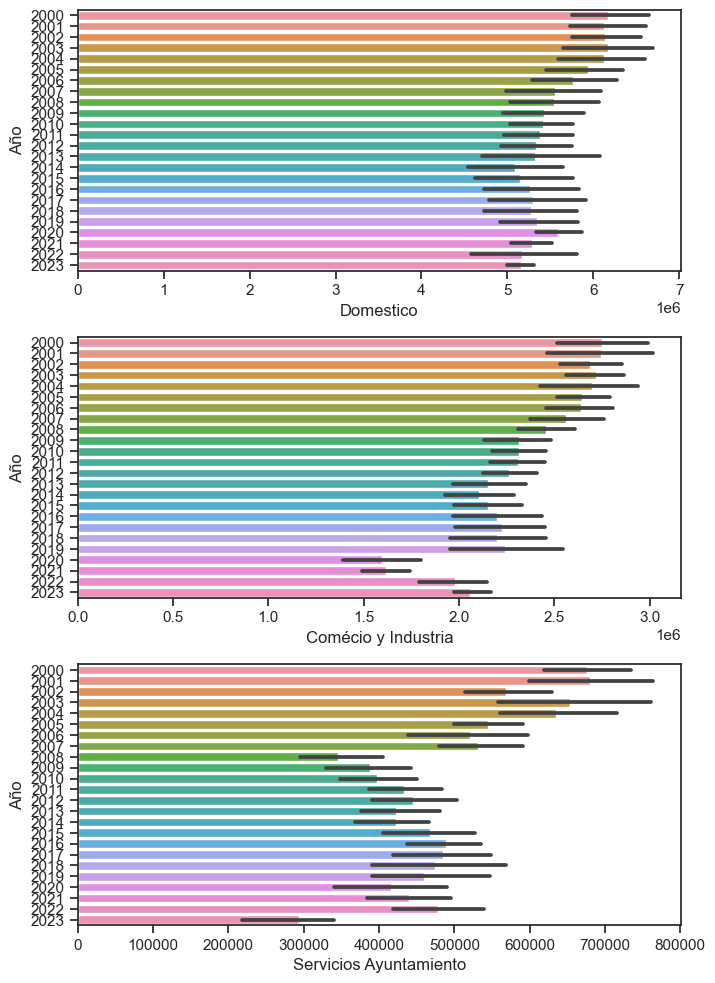

In [121]:
#Análisis del consumo
sns.set_theme(style="ticks")
i=1 #posição, depende da coluna "3" e da linha "2"
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.barplot(df_consumo, x="Domestico", y="Año", orient="h")
plt.subplot(3,3,4)
sns.barplot(df_consumo, x="Comécio y Industria", y="Año", orient="h")
plt.subplot(3,3,7)
sns.barplot(df_consumo, x="Servicios Ayuntamiento", y="Año", orient="h")
plt.tight_layout()

In [129]:
df_consumo.head()

,Año,Mês,TOTAL,Domestico,Comécio y Industria,Servicios Ayuntamiento
0,2000,Enero,11419599,7686184,3139986,593429
1,2000,Febrero,8658719,5942068,2108414,608237
2,2000,Marzo,9044661,5864622,2506078,673961
3,2000,Abril,10912590,7189097,3110204,613289
4,2000,Mayo,8427450,5757339,2170754,499357


In [130]:
#Calculo de consumo mensual per capita hasta 

lista_consumo_capta=list()
for x in range(df_consumo["Mês"].shape[0]):
    ano = df_consumo.iloc[x, 0]
    mes = df_consumo.iloc[x, 1]
    domestico = df_consumo.iloc[x,3]
    poblacion = df_poblacion[df_poblacion["Año"]==ano]["Barcelona"].sum()
    div = domestico/poblacion
    lista_consumo_capta.append(div)
    #print(ano)
                                          
                                              
                                        







/var/folders/pf/jmy6c5mn6nq33vg6h8hlpmdw0000gn/T/ipykernel_37915/4141537707.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  div = domestico/poblacion


In [131]:
lista_consumo_capta

[5.136910148329241,
 3.9712644676815487,
 3.9195049543329863,
 4.804691812819378,
 3.8478044679221477,
 3.948838642326966,
 5.101681118196898,
 3.646026174490365,
 3.5504662940947664,
 4.227799067812809,
 3.5182701471529794,
 3.8123602354126875,
 4.902921296065633,
 3.752452128277947,
 3.761470778735489,
 4.726970587746832,
 3.8214186305282913,
 3.963509541128992,
 5.057604171856576,
 3.7248733662165976,
 3.558699284207729,
 4.264035341205387,
 3.4136781093783735,
 3.8443087041004436,
 4.799750522200905,
 4.866642657429658,
 3.3217936209639927,
 3.73439257721698,
 4.169258572934606,
 3.7667382578461095,
 4.413693777460565,
 4.215569771934075,
 3.554864817082354,
 3.939670244042981,
 3.7725666092627637,
 3.692955689861772,
 4.901097338915221,
 4.25250989108747,
 3.731955004555397,
 4.005367281255647,
 3.8449654965003686,
 3.6747560240545183,
 4.611006369974057,
 3.5345161359618587,
 3.450154731863391,
 4.308493256622385,
 3.7925127216254366,
 2.6747497058894143,
 4.491305923299036,
 3.9

In [132]:
#Copia de seguridad
df_consumo2 = df_consumo.copy()


In [133]:
#Creación de la variable de consumo mensual de agua (em metros cúbicos)
df_consumo2["consumo_mes"] = lista_consumo_capta

In [134]:
#Creación de la variable de consumo mensual de agua em litros (x1000)
df_consumo2["Consumo_litros_mes"] = df_consumo2["consumo_mes"].mul(1000)

In [135]:
#Creación de la variable de consumo diario de agua en litros (aproximadamente, convencionamos dividir por 30 dias)
df_consumo2["Consumo_litros_dia"] = df_consumo2["Consumo_litros_mes"]/30

In [136]:
#Verificación del Dataset
df_consumo2.head()

,Año,Mês,TOTAL,Domestico,Comécio y Industria,Servicios Ayuntamiento,consumo_mes,Consumo_litros_mes,Consumo_litros_dia
0,2000,Enero,11419599,7686184,3139986,593429,5.136910,5136.910148,171.230338
1,2000,Febrero,8658719,5942068,2108414,608237,3.971264,3971.264468,132.375482
2,2000,Marzo,9044661,5864622,2506078,673961,3.919505,3919.504954,130.650165
3,2000,Abril,10912590,7189097,3110204,613289,4.804692,4804.691813,160.156394
4,2000,Mayo,8427450,5757339,2170754,499357,3.847804,3847.804468,128.260149


In [137]:
#Copia de seguridad, borrando los datos de 2023 (año con dados mensuales incompletos)
df_consumo2 = df_consumo2[df_consumo2["Año"]<2023][["Mês", "Consumo_litros_dia"]]


In [138]:
df_consumo2.describe()

,Consumo_litros_dia
count,276.000000
mean,115.976154
std,20.867103
min,54.425242
25%,103.837003
50%,113.745956
75%,127.736914
max,178.821338


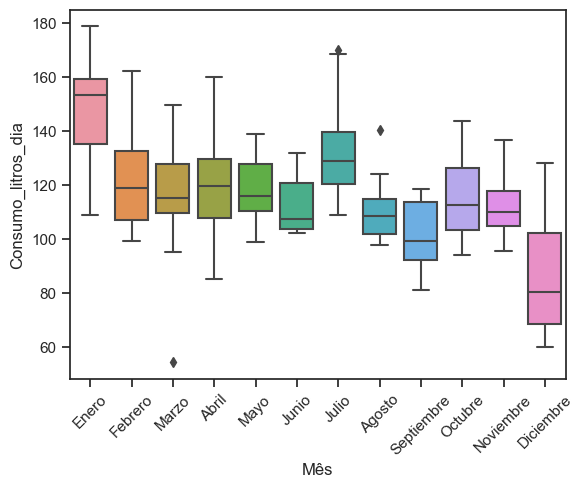

In [144]:
ax = sns.boxplot(df_consumo2, x="Mês", y="Consumo_litros_dia")
ax.tick_params(axis='x', labelrotation=45)

In [145]:
#Considerando las estadísticas de los meses, decidimos quedarnos com la media mensual de los meses de 2000 a 2022.
df_consumo_medio = df_consumo2.groupby(["Mês"], as_index=False)["Consumo_litros_dia"].mean()
df_consumo_medio

,Mês,Consumo_litros_dia
0,Abril,119.881965
1,Agosto,110.438661
2,Diciembre,86.226245
3,Enero,147.716194
4,Febrero,121.116095
5,Julio,131.933068
6,Junio,112.474479
7,Marzo,115.336357
8,Mayo,118.320058
9,Noviembre,111.824489


In [ ]:
#Exportación de la tabla de consumo medio en litros por dia, a ser utilizado por los equipos de Back and FrontEnd
df_consumo_medio.to_csv("PromedioConsumoAgua.csv")